In [1]:
# 과일 이미지 300장(사과, 파인애플, 바나나)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 넘파이 배열(2차원 넘파이 배열 : 행렬)
# 300장, 가로100 세로100픽셀
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [3]:
# 흑백사진 : 0~255 // 0에 가까울수록 검은색 255에 가까울수록 흰색
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [4]:
fruits[0].shape

(100, 100)

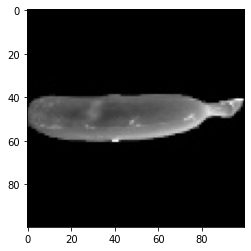

In [10]:
# 0~99 : 사과
# 100~199 : 파인애플
# 200~299 : 바나나
plt.imshow(fruits[200], cmap = 'gray')

In [12]:
# 비지도 학습 : 문제집 + 힌트
# 1. 지도 학습
# 2. 문제집 + 정답지(다른 머신러닝) - GAN

fruits2 = fruits.reshape(300, 10000)
fruits2.shape

(300, 10000)

In [13]:
fruits2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [14]:
# 인공신경망(딥러닝) : 미분
# 비지도 학습(KMeans) : 평균

apple = fruits2[:100]
pineapple = fruits2[100:200]
banana = fruits2[200:]

In [17]:
np.mean(apple, axis = 1) # axis = 1 열방향 // 0 행방향

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [27]:
len(np.mean(apple, axis = 0)) # axis = 1 열방향 // 0 행방향

10000

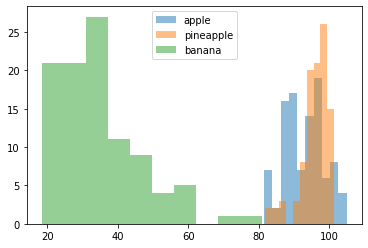

In [20]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.5)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.5)
plt.hist(np.mean(banana, axis = 1), alpha = 0.5)
plt.legend(['apple', 'pineapple', 'banana'])

<BarContainer object of 10000 artists>

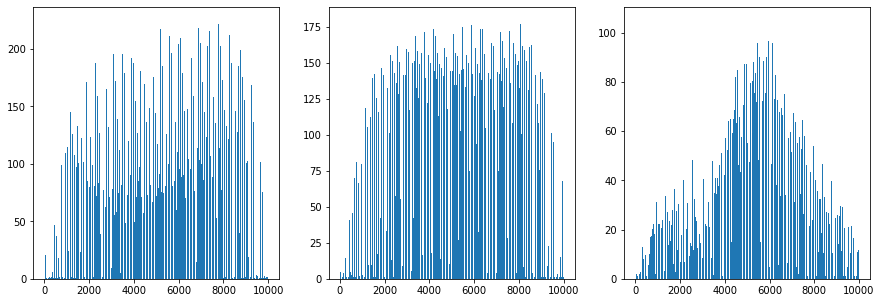

In [28]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.bar(range(10000), np.mean(apple, axis = 0))
ax2.bar(range(10000), np.mean(pineapple, axis = 0))
ax3.bar(range(10000), np.mean(banana, axis = 0))

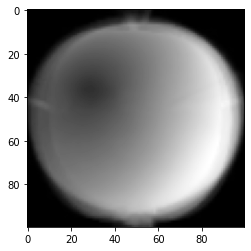

In [34]:
a = np.mean(apple, axis = 0).reshape(100, 100)

plt.imshow(a, cmap = 'gray')

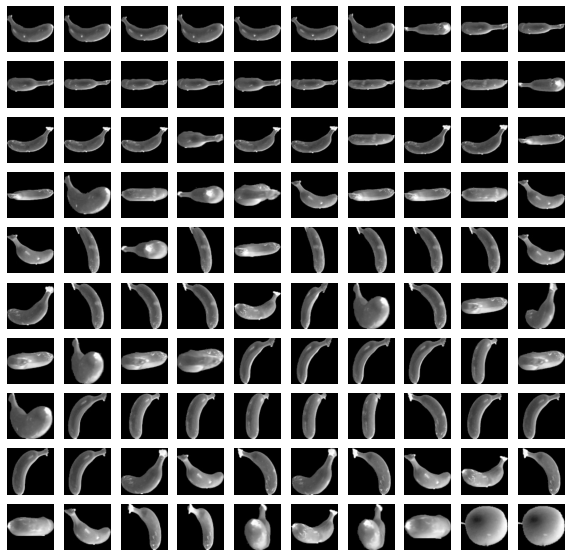

In [51]:
# 무작위 300장 - 사과 사진 평균 => 픽셀값의 평균의 합이 0에 가까울수록 사과사진
# 빼고 평균의 합이 작은 순서로 1등부터 100등까지 사과일 것이다.

a = np.mean(banana, axis = 0).reshape(100, 100)
result = abs(fruits - a).reshape(300, 10000)
result_mean = np.mean(result, axis = 1)

result = np.argsort(result_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[result[i*10+j]], cmap = 'gray')
        axs[i,j].axis('off')

plt.show()

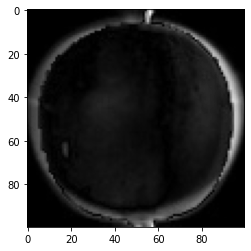

In [43]:
plt.imshow(result[0], cmap = 'gray')

In [52]:
# KMeans
from sklearn.cluster import KMeans

fruits = np.load('fruits_300.npy')
fruits2 = fruits.reshape(-1, 10000)

km = KMeans(n_clusters=3)
km.fit(fruits2)

KMeans(n_clusters=3)

In [53]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

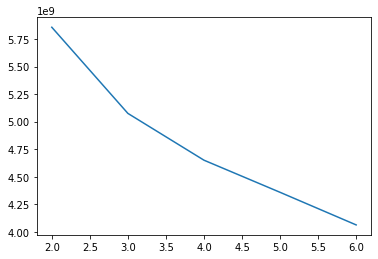

In [54]:
# 과일의 종류가 몇 종류인지 모를 때?
# 이너셔

# 2개 : ~~~
# 3개 : ~~~
# 4개 : ~~~

box = []

for i in range(2, 7):
    km = KMeans(n_clusters=i)
    km.fit(fruits2)
    box.append(km.inertia_)

plt.plot(range(2,7), box)

In [58]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

data, target = iris['data'], iris['target']

km = KMeans(n_clusters=3)
km.fit(data)

# KMeans로 data를 활용해서 target2를 만들고 시각화해보세요.
df = pd.DataFrame(data, columns = iris['feature_names'])

df['target1'] = target
df['target2'] = km.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target1,target2
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


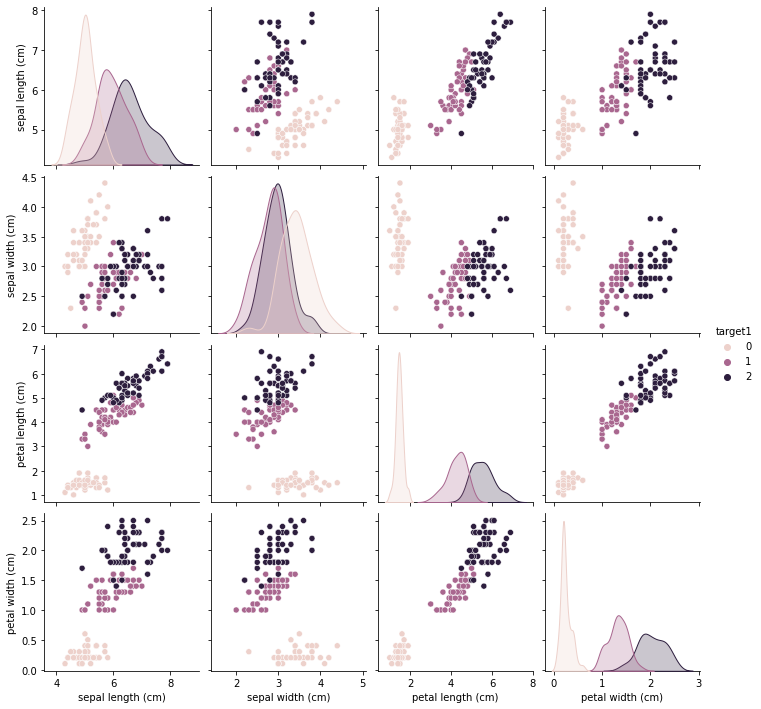

In [57]:
import seaborn as sns
sns.pairplot(df, hue='target1')

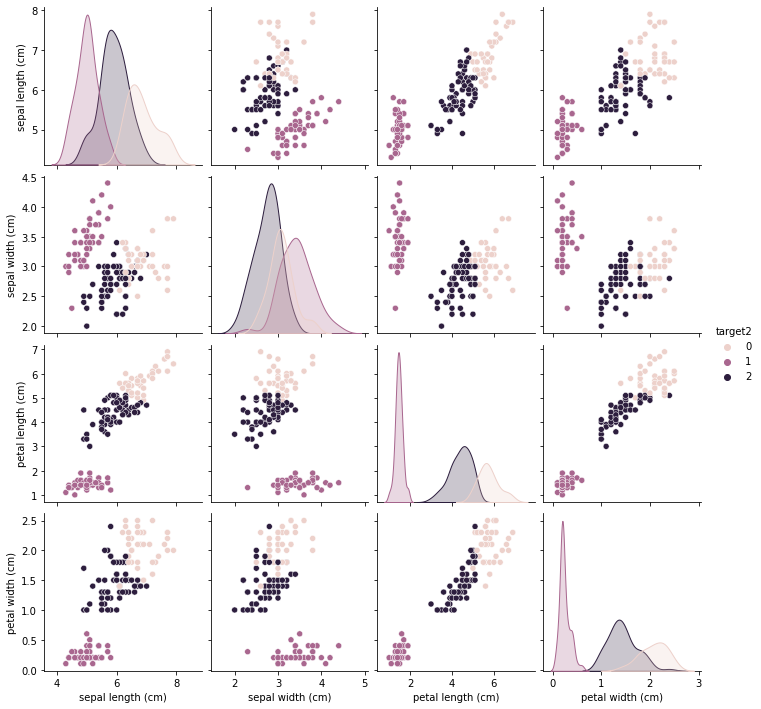

In [60]:
del df['target1']
sns.pairplot(df, hue='target2')

In [64]:
# fruits2, target // 지도 학습 모델을 선택해서 학습 후 평가

fruits = np.load('fruits_300.npy')
fruits2 = fruits.reshape(-1, 10000)

km = KMeans(n_clusters=3)
km.fit(fruits2)

target = km.labels_

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)
rf.fit(fruits2, target)

RandomForestClassifier(oob_score=True)

In [66]:
rf.oob_score_

0.99

In [67]:
fruits2.shape

(300, 10000)

In [70]:
4096 * 2160 * 300

2654208000

In [71]:
# 1. 이미지 사이즈 줄이는 방법
# 2. 주성분 분석(데이터의 특징)

from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=2) # 50개의 주성분 (1등~50등)
fruits_pca = pca.fit_transform(fruits2)

rf = RandomForestClassifier(oob_score=True)
rf.fit(fruits_pca, target)
rf.oob_score_

0.9966666666666667

In [80]:
sum(pca.explained_variance_ratio_) # 원본 데이터를 92% 만큼 설명할 수 있다.

0.5229877245800599

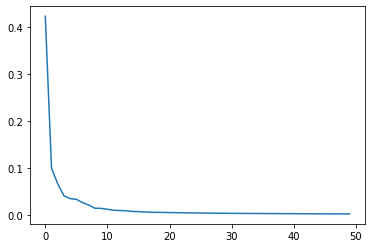

In [77]:
plt.plot(pca.explained_variance_ratio_)

In [83]:
df = pd.DataFrame(fruits_pca, columns = ['c1', 'c2'])

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

df['target'] = km.labels_
df

,c1,c2,target
0,-2778.417795,-1571.873801,0
1,-3078.273651,-2739.270415,0
2,-2620.610729,-1486.870543,0
3,-3113.717711,-2530.022832,0
4,-2520.647051,-2330.647911,0
...,...,...,...
295,4955.542497,-1145.276770,1
296,5746.358051,1927.059826,1
297,5182.128683,121.760506,1
298,3987.988006,-70.881612,1


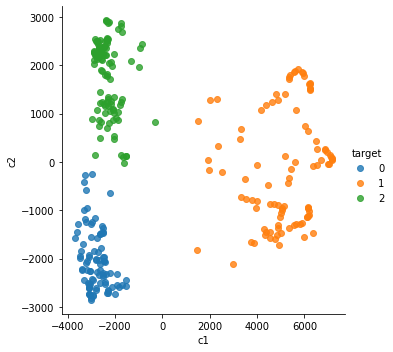

In [85]:
import seaborn as sns

sns.lmplot(x='c1', y='c2', data=df, hue='target', fit_reg=False)

In [87]:
# 인공신경망
np.array([1,3,5,4,2]) + 10

array([11, 13, 15, 14, 12])

In [93]:
import numpy as np

# 넘파이 배열
x = np.array([1.0, 2, 3]) # tensorflow
x

array([1., 2., 3.])

In [91]:
x.dtype

dtype('float64')

In [94]:
x = np.array(['c1', 'c2', 'c3'])
x

array(['c1', 'c2', 'c3'], dtype='<U2')

In [95]:
x.dtype # 문자열 타입

dtype('<U2')

### Numpy의 N차원 배열

In [96]:
A = np.array([[1,2], [3,4]])
A

array([[1, 2],
       [3, 4]])

In [97]:
A.shape

(2, 2)

In [98]:
B = np.array([[3,0], [0,6]])
B

array([[3, 0],
       [0, 6]])

In [99]:
A + B

array([[ 4,  2],
       [ 3, 10]])

In [100]:
A * B

array([[ 3,  0],
       [ 0, 24]])

In [101]:
A * 10

array([[10, 20],
       [30, 40]])

### 브로드캐스트
* 형상이 다른 배열끼리 계산

In [102]:
A = np.array([[1,2], [3,4]])
B = np.array([10, 20])

A

array([[1, 2],
       [3, 4]])

In [103]:
B

array([10, 20])

In [104]:
A * B

array([[10, 40],
       [30, 80]])

In [105]:
# 원소 접근

X = np.array([[51,55], [14,19], [0, 4]])
X

array([[51, 55],
       [14, 19],
       [ 0,  4]])

In [106]:
X.shape

(3, 2)

In [107]:
X[0]

array([51, 55])

In [108]:
X[0][0]

51

In [109]:
for i in X:
    print(i)

[51 55]
[14 19]
[0 4]


In [110]:
X2 = X.flatten()
X2

array([51, 55, 14, 19,  0,  4])

In [111]:
X2[np.array([0,2,4])]

array([51, 14,  0])

In [112]:
X2 > 15

array([ True,  True, False,  True, False, False])

In [113]:
X2[X2 > 15]

array([51, 55, 19])

In [114]:
# 연산 함수

x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
x

array([[0.1, 0.8, 0.1],
       [0.3, 0.1, 0.6],
       [0.2, 0.5, 0.3],
       [0.8, 0.1, 0.1]])

In [117]:
y = np.argmax(x, axis = 1)
y

array([1, 2, 1, 0])

In [118]:
t = np.array([1,2,0,0])
t

array([1, 2, 0, 0])

In [119]:
y == t # True 1, False 0

array([ True,  True, False,  True])

In [121]:
np.sum(y==t) / len(y)

0.75

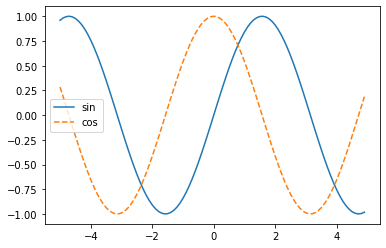

In [130]:
# Numpy를 통해서 그래프 그리기

# 사인, 코사인 그래프를 함께 그려보세요.
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label = 'sin')
plt.plot(x, y2, label = 'cos', linestyle = '--')
plt.legend(loc = "center left")

### 퍼셉트론
* 인공신경망(딥러닝)의 기원이 되는 알고리즘  
* 다수의 신호를 입력으로 받아서 하나의 신호를 출력  
* 신호는 흐른다/안흐른다(1 또는 0) 두 가지 값을 가질 수 있음

In [133]:
def AND(x1, x2):
    w1, w2 = 0.5, 0.5
    theta = 0.6
    if w1*x1 + w2*x2 > theta:
        return 1
    else:
        return 0

In [134]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [135]:
# OR 게이트

def OR (x1,x2):
    w1, w2 = 0.5, 0.5
    theta = 0.3
    if w1*x1 + w2*x2 > theta:
        return 1
    else:
        return 0

In [136]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


In [137]:
def NAND(x1, x2):
    w1, w2 = 0.5, 0.5
    theta = 0.6
    if w1*x1 + w2*x2 > theta:
        return 0
    else:
        return 1

In [138]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


In [139]:
def XOR (x1,x2):
    w1, w2 = 0.3, 0.5
    theta = 0.3
    if w1*x1 + w2*x2 > theta:
        return 1
    else:
        return 0

In [140]:
# 여러 개의 뉴런이 결합되어있음(수십억개?)

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [141]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


In [145]:
def step_function(x):
    y = x > 0
    return y.astype(int)

In [149]:
x = np.array([-1, 1, 3])
step_function(x)

array([0, 1, 1])

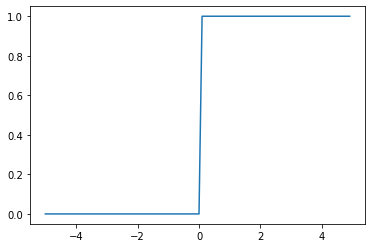

In [151]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.plot(x, y)

In [152]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

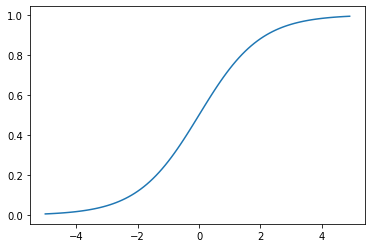

In [153]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y)

In [154]:
# 비선형 함수
# 렐루 함수

def relu(x):
    return np.maximum(0, x)

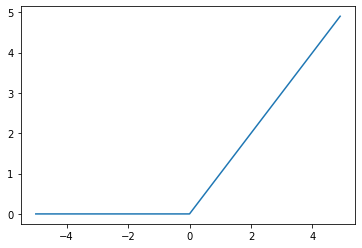

In [155]:
x = np.arange(-5, 5, 0.1)
y = relu(x)

plt.plot(x, y)

### 다차원 배열

In [158]:
A = np.array([[1,2]])
B = np.array([[5,6], [7,8]])

# 행렬 곱
np.dot(A, B)

array([[19, 22]])

In [159]:
X = np.array([1, 2])
W = np.array([[1,3,5], [2,4,6]])

np.dot(X, W)

array([ 5, 11, 17])

In [160]:
# 3층 신경망 구현하기

X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [164]:
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [166]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [167]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

In [168]:
# 소프트맥스

exp_a = np.exp(A3)
exp_a

array([1.37276517, 2.00627364])

In [169]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

3.379038805628115

In [170]:
exp_a / sum_exp_a

array([0.40625907, 0.59374093])

In [171]:
def softmax(x):
    exp_a = np.exp(x)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [172]:
softmax(A3)

array([0.40625907, 0.59374093])

In [176]:
a = np.array([1010, 1000, 980])
a = a - np.max(a)
softmax(a)

array([9.99954602e-01, 4.53978687e-05, 9.35719815e-14])

In [ ]:
# 인공신경망(경사하강법)

y = [20, 75, 55, 90]

